In [1]:
import pandas as pd
file_path=("/Users/saranya/Documents/Projects/customer_conversion_project/test_data.xlsx")
test_df=pd.read_excel(file_path)

In [2]:
file_path=("/Users/saranya/Documents/Projects/customer_conversion_project/train_data.xlsx")
train_df=pd.read_excel(file_path)

In [3]:
train_df.columns

Index(['year', 'month', 'day', 'order', 'country', 'session_id',
       'page1_main_category', 'page2_clothing_model', 'colour', 'location',
       'model_photography', 'price', 'price_2', 'page'],
      dtype='object')

In [4]:
train_df.shape

(132379, 14)

In [5]:
train_df.describe

<bound method NDFrame.describe of         year  month  day  order  country  session_id  page1_main_category  \
0       2008      6   22     21       29       15648                    3   
1       2008      5   19      6       29       10018                    2   
2       2008      7   15      2       29       19388                    3   
3       2008      5    2      2       29        7181                    2   
4       2008      6    9     16       29       13493                    2   
...      ...    ...  ...    ...      ...         ...                  ...   
132374  2008      7    4      3       29       17622                    4   
132375  2008      6   19      9       29       15165                    3   
132376  2008      7   15      4       29       19359                    1   
132377  2008      7   28     16       29       21454                    3   
132378  2008      7    6     17       29       17897                    2   

       page2_clothing_model  colour  loca

In [6]:
train_df.dtypes

year                     int64
month                    int64
day                      int64
order                    int64
country                  int64
session_id               int64
page1_main_category      int64
page2_clothing_model    object
colour                   int64
location                 int64
model_photography        int64
price                    int64
price_2                  int64
page                     int64
dtype: object

In [7]:
#Handling outliers

numerical=train_df.select_dtypes(include='number').columns
numerical



Index(['year', 'month', 'day', 'order', 'country', 'session_id',
       'page1_main_category', 'colour', 'location', 'model_photography',
       'price', 'price_2', 'page'],
      dtype='object')

1
2
3
4
5
6
7
8
9
10


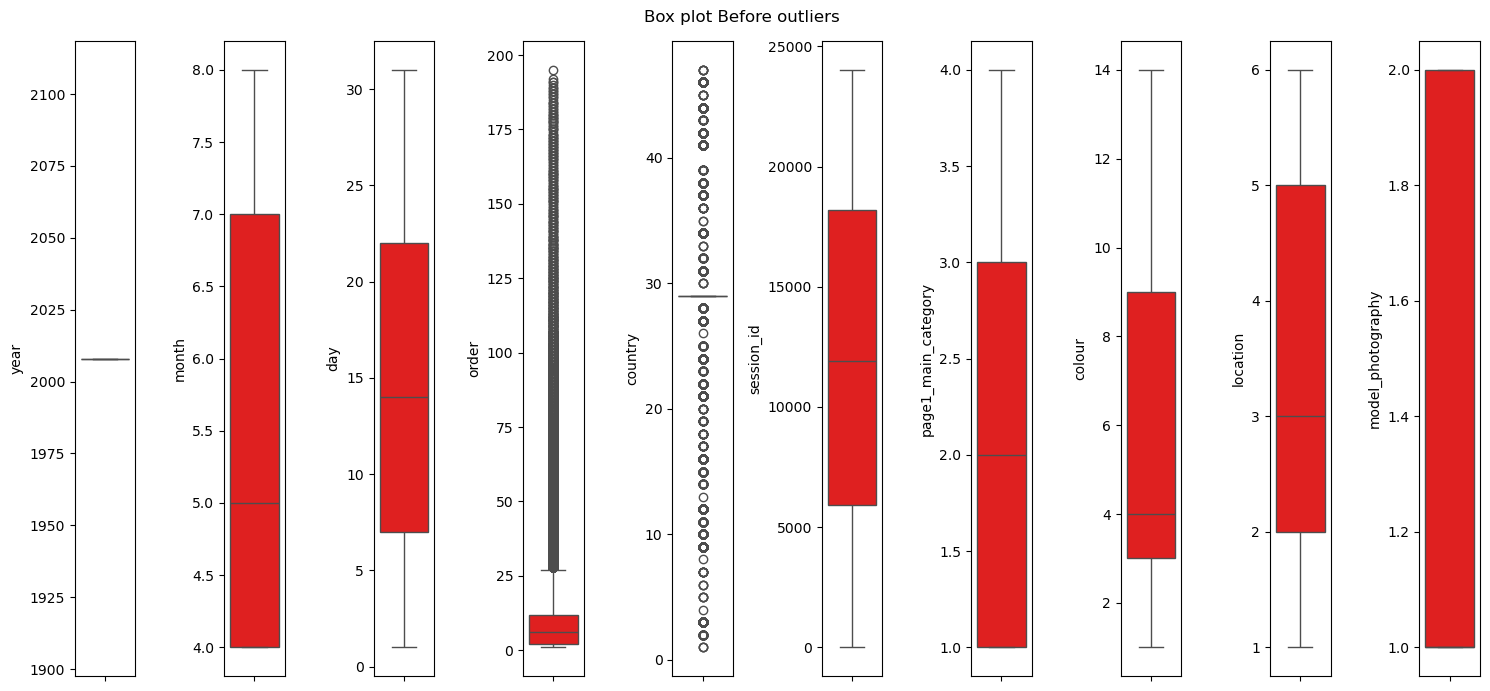

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical=['year', 'month', 'day', 'order', 'country', 'session_id',
       'page1_main_category', 'colour', 'location', 'model_photography'
       ]
plt.figure(figsize=(15,7))
plt.suptitle("Box plot Before outliers ")
for i in range(0,len(numerical)):
    print(i+1)
    plt.subplot(1, len(numerical), i+1)
    sns.boxplot(y=train_df[numerical[i]],color='red')
    plt.tight_layout()

In [9]:
import numpy as np

for col in numerical:
    Q1=train_df[col].quantile(0.25)
    Q3=train_df[col].quantile(0.75)
    IQR=Q3-Q1

    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q1 + 1.5 * IQR

    # CAP VALUES in lower and upper bound bound 

    train_df[col]=np.where(train_df[col]<lower_bound,lower_bound,train_df[col])
    train_df[col]=np.where(train_df[col]>upper_bound,upper_bound,train_df[col])


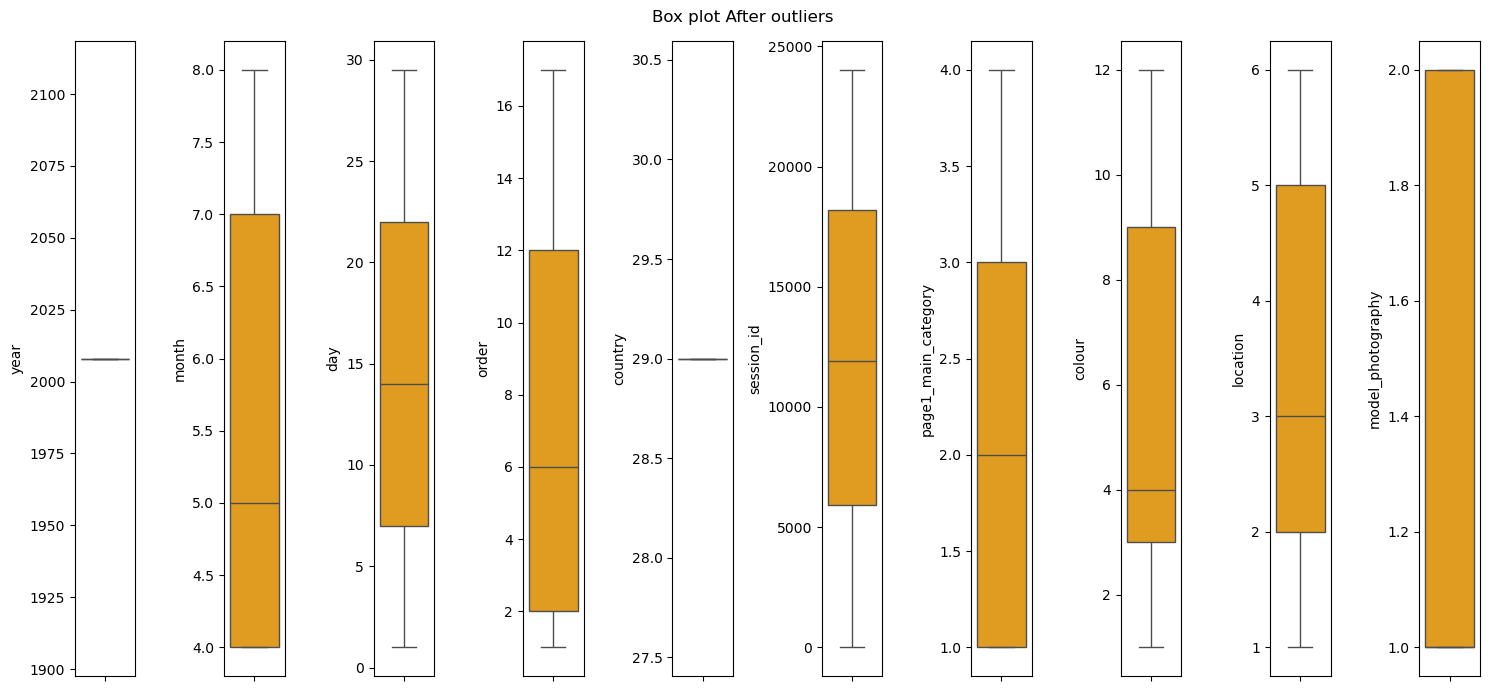

In [10]:
plt.figure(figsize=(15,7))
plt.suptitle("Box plot After outliers ")
for i in range(0,len(numerical)):
    plt.subplot(1, 10, i+1)
    sns.boxplot(y=train_df[numerical[i]],color='orange')
    plt.tight_layout()

In [11]:
numerical_feature=train_df.select_dtypes(include='number').columns
numerical_feature

Index(['year', 'month', 'day', 'order', 'country', 'session_id',
       'page1_main_category', 'colour', 'location', 'model_photography',
       'price', 'price_2', 'page'],
      dtype='object')

In [12]:
med=train_df[numerical_feature].median()

In [13]:
train_df[numerical_feature]=train_df[numerical_feature].fillna(med)

In [14]:
categorical_feature=train_df.select_dtypes(include='object').columns
categorical_feature

Index(['page2_clothing_model'], dtype='object')

In [15]:
mod=train_df[categorical_feature].mode()

In [17]:
train_df[categorical_feature]=train_df[categorical_feature].fillna(mod)

In [18]:
train_df=pd.concat([train_df[numerical_feature],train_df[categorical_feature]],axis=1)
train_df

,year,month,day,order,country,session_id,page1_main_category,colour,location,model_photography,price,price_2,page,page2_clothing_model
0,2008.0,6.0,22.0,17.0,29.0,15648.0,3.0,12.0,1.0,2.0,48,1,2,C20
1,2008.0,5.0,19.0,6.0,29.0,10018.0,2.0,12.0,3.0,1.0,57,1,2,B26
2,2008.0,7.0,15.0,2.0,29.0,19388.0,3.0,9.0,5.0,1.0,48,1,1,C13
3,2008.0,5.0,2.0,2.0,29.0,7181.0,2.0,2.0,4.0,1.0,43,2,1,B11
4,2008.0,6.0,9.0,16.0,29.0,13493.0,2.0,9.0,5.0,1.0,57,1,2,B31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,2008.0,7.0,4.0,3.0,29.0,17622.0,4.0,2.0,1.0,1.0,48,1,2,P19
132375,2008.0,6.0,19.0,9.0,29.0,15165.0,3.0,12.0,3.0,1.0,28,2,2,C26
132376,2008.0,7.0,15.0,4.0,29.0,19359.0,1.0,3.0,2.0,2.0,38,2,1,A4
132377,2008.0,7.0,28.0,16.0,29.0,21454.0,3.0,9.0,5.0,2.0,20,2,3,C50


In [19]:
# To find skewness

cols=['year', 'month', 'day', 'order',  'session_id',
         'model_photography','price', 'price_2', 'page']
skews=train_df[cols].skew()
skews

year                 0.000000
month                0.266242
day                  0.160912
order                0.608382
session_id           0.008814
model_photography    1.094163
price                0.524068
price_2              0.046077
page                 1.373365
dtype: float64

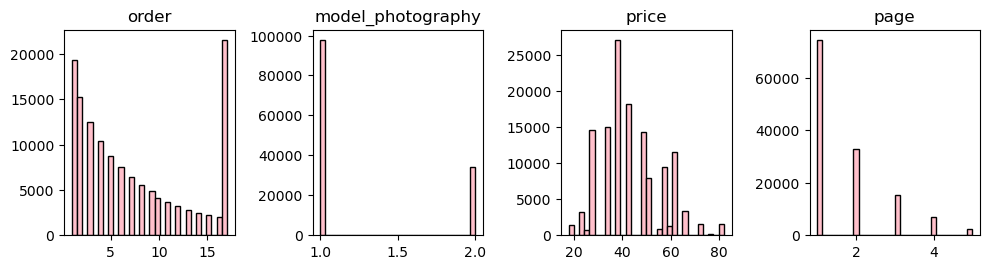

In [20]:
#plot histograms before transformation

skewed_cols=skews[abs(skews>0.5)].index
plt.figure(figsize=(10,5))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(2 , 4, i)
    plt.hist(train_df[col],bins=30,color='pink',edgecolor='black')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

In [21]:
# Apply Log transformatiuon 
import numpy as np

pos_skew=['order','model_photography']

train_df[pos_skew]=train_df[pos_skew].apply(lambda x: np.log1p(x))

In [22]:
train_df.head()

,year,month,day,order,country,session_id,page1_main_category,colour,location,model_photography,price,price_2,page,page2_clothing_model
0,2008.0,6.0,22.0,2.890372,29.0,15648.0,3.0,12.0,1.0,1.098612,48,1,2,C20
1,2008.0,5.0,19.0,1.945910,29.0,10018.0,2.0,12.0,3.0,0.693147,57,1,2,B26
2,2008.0,7.0,15.0,1.098612,29.0,19388.0,3.0,9.0,5.0,0.693147,48,1,1,C13
3,2008.0,5.0,2.0,1.098612,29.0,7181.0,2.0,2.0,4.0,0.693147,43,2,1,B11
4,2008.0,6.0,9.0,2.833213,29.0,13493.0,2.0,9.0,5.0,0.693147,57,1,2,B31


In [23]:
#Apply encoding 

from sklearn.preprocessing import LabelEncoder

encoders={}
for col in train_df.columns:
    if train_df[col].dtype== 'object':
        label_encoder=LabelEncoder()
        train_df[col]=label_encoder.fit_transform(train_df[col])
        encoders[col]=label_encoder
        encoders


In [24]:
encoders

{'page2_clothing_model': LabelEncoder()}

In [25]:
import pickle
with open("label_encoder.pkl",'wb')as f:
    pickle.dump(encoders,f)

print("label encoders saved successfully")


label encoders saved successfully


In [26]:
train_df=train_df.astype(int)

In [27]:
print(train_df.dtypes)

year                    int64
month                   int64
day                     int64
order                   int64
country                 int64
session_id              int64
page1_main_category     int64
colour                  int64
location                int64
model_photography       int64
price                   int64
price_2                 int64
page                    int64
page2_clothing_model    int64
dtype: object


In [28]:
# create target

train_df['purchase_flag']=train_df['order'].apply(lambda x: 1 if x >=2 else 0)

# check values

print(train_df['purchase_flag'].value_counts())

purchase_flag
0    73631
1    58748
Name: count, dtype: int64


In [29]:
# Regression Target 

train_df["revenue"]=train_df["price"] * train_df["price_2"]
train_df.drop(["price","price_2"],axis=1,inplace=True)

In [30]:
train_df.head()


,year,month,day,order,country,session_id,page1_main_category,colour,location,model_photography,page,page2_clothing_model,purchase_flag,revenue
0,2008,6,22,2,29,15648,3,12,1,1,2,88,1,48
1,2008,5,19,1,29,10018,2,12,3,0,2,60,0,57
2,2008,7,15,1,29,19388,3,9,5,0,1,80,0,48
3,2008,5,2,1,29,7181,2,2,4,0,1,45,0,86
4,2008,6,9,2,29,13493,2,9,5,0,2,66,1,57


In [31]:
train_df["order"].unique()

array([2, 1, 0])

In [32]:
from imblearn.over_sampling import SMOTE,SMOTENC

#Define features (x). and target (Y)
X=train_df.drop('purchase_flag',axis=1)
y=train_df["purchase_flag"]



categorical_col=['country', 
       'page1_main_category', 'colour', 'location',
       'page','page2_clothing_model'] 

# SMOTE needs categorical columns as indices for non continuous features
categorical_indices=[X.columns.get_loc(col) for col in categorical_col]

# APPLY SMOTE
smote=SMOTENC(categorical_features=categorical_indices,random_state=42)
X_resampled,y_resampled=smote.fit_resample(X,y)

#convert to DataFrame

df_resampled=pd.DataFrame(X_resampled,columns=X.columns)
df_resampled['purchase_flag']=y_resampled

#verify new class distribution 

df_resampled['purchase_flag'].value_counts()

purchase_flag
1    73631
0    73631
Name: count, dtype: int64

In [33]:
# Model building 

import warnings
import numpy as np
from xgboost import XGBClassifier 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

warnings.filterwarnings("ignore")



In [34]:
df_resampled.columns

Index(['year', 'month', 'day', 'order', 'country', 'session_id',
       'page1_main_category', 'colour', 'location', 'model_photography',
       'page', 'page2_clothing_model', 'revenue', 'purchase_flag'],
      dtype='object')

In [35]:
import pandas as pd 
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,FunctionTransformer
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt


Logistic Regression: Accuracy=1.0000
Logistic Regression: Accuracy=1.0000,AUC=N/A


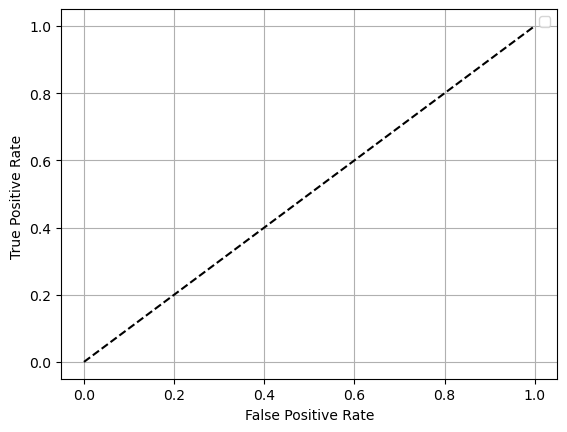

Decision Tree: Accuracy=1.0000
Decision Tree: Accuracy=1.0000,AUC=N/A


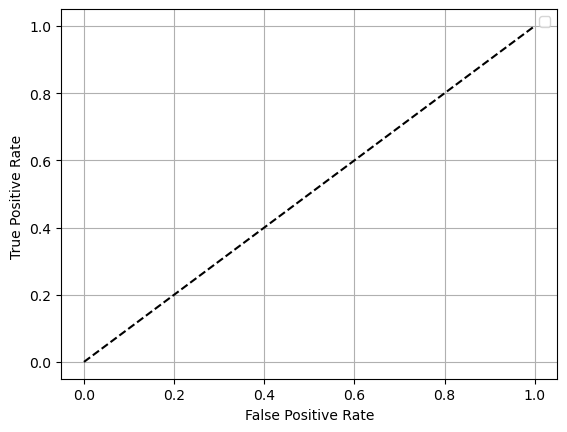

K-Nearest Neighbors: Accuracy=0.9775
K-Nearest Neighbors: Accuracy=0.9775,AUC=N/A


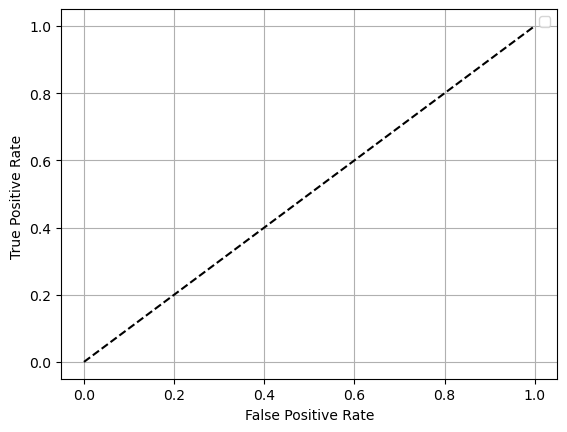

Random Forest: Accuracy=1.0000
Random Forest: Accuracy=1.0000,AUC=N/A


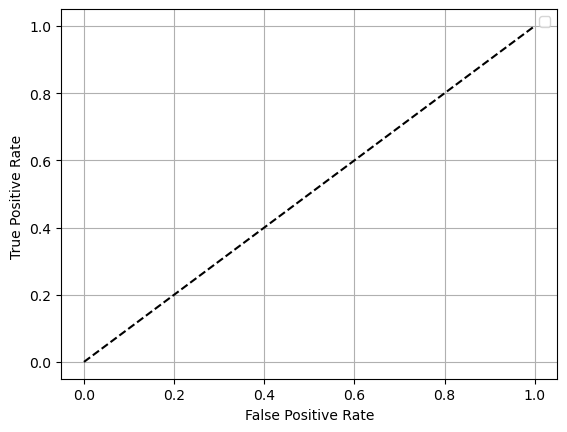

XGBoost Classifier: Accuracy=1.0000
XGBoost Classifier: Accuracy=1.0000,AUC=N/A


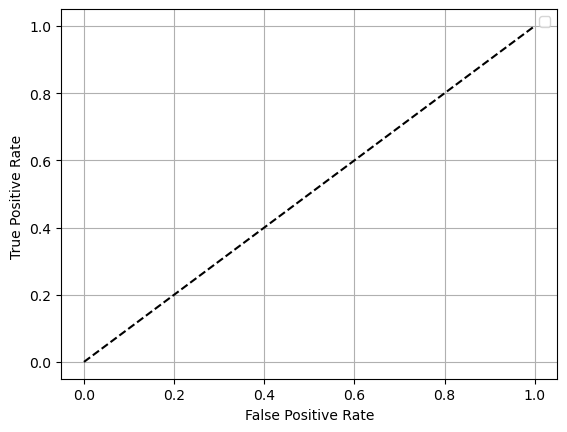

In [37]:
# Define column groups 
nominal_data=[ 'country','page1_main_category', 'colour', 'location', 'model_photography',
        'page2_clothing_model']
log_scale_cols=['order','revenue','page']

# Transformation pipeline

log_scale_pipeline=Pipeline([('log',FunctionTransformer(np.log1p,validate=True)),('scaler',StandardScaler())])


#Combine Transformations 
preprocessor=ColumnTransformer(transformers=[
    ('label',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),nominal_data),
    ('logscale',log_scale_pipeline,log_scale_cols)],
    remainder='passthrough')

#Define full pipeline with classifier

pipeline=Pipeline(steps=[('preprocessing',preprocessor),('classifier',XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42))])

#split data

X=train_df.drop(columns=['purchase_flag','session_id'],errors='ignore')
y=train_df['purchase_flag']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

models={
    "Logistic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "K-Nearest Neighbors":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier(),
    "XGBoost Classifier":XGBClassifier(n_estimators=200,use_label_emcoder=False,eval_metric='logloss')

}

#Loop through models 

for name,model in models.items():
    pipeline=Pipeline([('preprocessor',preprocessor),('classsifier',model)])

    #Train the model

    pipeline.fit(X_train,y_train)

    # make predictions 

    y_pred=pipeline.predict(X_test)

    #calculate accuracy
    accuracy=accuracy_score(y_test,y_pred)

    print(f"{name}: Accuracy={accuracy:.4f}")

    #AUC calculation 
    if hasattr(model,"predict_prob"):
        y_proba=pipeline.predict_proba(X_test)[:, 1]
        auc=roc_auc_score(y_test,y_proba)

        #optional:plot ROC curve

        fpr,tpr,_=roc_curve(y_test,y_proba)
        plt.plot(fpr,tpr,label=f"{name} (AUC={auc:.2f})")

    else:
        auc=None
        print(f"{name}: Accuracy={accuracy:.4f},AUC={auc if auc is not None else 'N/A'}")
    # show ROC curve 
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate ")
    plt.legend()
    plt.grid(True)
    plt.show()




In [38]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('label',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['country',
                                                   'page1_main_category',
                                                   'colour', 'location',
                                                   'model_photography',
                                                   'page2_clothing_model']),
                                                 ('logscale',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=Tru...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [39]:
import pickle

# save the model

with open('xgboost_classifier_pipeline.pkl','wb') as file:
    pickle.dump(pipeline,file)
    

In [40]:
X_train.columns

Index(['year', 'month', 'day', 'order', 'country', 'page1_main_category',
       'colour', 'location', 'model_photography', 'page',
       'page2_clothing_model', 'revenue'],
      dtype='object')

In [41]:
#Rgression model

train_df['purchase_flag']==1

0          True
1         False
2         False
3         False
4          True
          ...  
132374    False
132375     True
132376    False
132377     True
132378     True
Name: purchase_flag, Length: 132379, dtype: bool

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,FunctionTransformer
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

# step 1:Filter buyers only

buyers_df=train_df[train_df['purchase_flag']==1]

# step 2:Define target and features

X=buyers_df.drop(columns=['revenue','purchase_flag','session_id'])
y=buyers_df['revenue']

#step 3:
#Define column groups 
nominal_data=['country','page1_main_category', 'colour', 'location', 'model_photography',
        'page2_clothing_model']
log_scale_cols=['order','page']


#step 4:create preprocessing pipeline 

log_scale_pipeline=Pipeline([('log',FunctionTransformer(np.log1p,validate=True)),('scaler',StandardScaler())])


preprocessor=ColumnTransformer(transformers=[('label',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),nominal_data),('logscale',log_scale_pipeline,log_scale_cols)],remainder='passthrough')


#step 5:  Define models to compare 

models={
    "Linear Regression":LinearRegression(),
    "Random Forest":RandomForestRegressor(random_state=42),
    "Gradient Boosting":GradientBoostingRegressor(random_state=42),
    "XGBoost":XGBRegressor(random_state=42)
}

#step6: Train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#step 7: compare models
result=[]

for name,model in models.items():
    pipeline=Pipeline([('preprocessing',preprocessor),('regressor',model)])
    pipeline.fit(X_train,y_train)
    y_pred=pipeline.predict(X_test)

    mse=mean_squared_error(y_test,y_pred)
    rmse=mse**0.5
    r2=r2_score(y_test,y_pred)

    result.append({'Model':name,
                   'RMSE':round(rmse,2),
                   'R2':round(r2,4)})
    
    print( f"{name}-->RMSE:{rmse:.2f},r2:{r2:.4f}")

Linear Regression-->RMSE:10.34,r2:0.4210
Random Forest-->RMSE:0.02,r2:1.0000
Gradient Boosting-->RMSE:5.92,r2:0.8104
XGBoost-->RMSE:0.05,r2:1.0000


In [43]:
train_df['revenue']

0         48
1         57
2         48
3         86
4         57
          ..
132374    48
132375    56
132376    76
132377    40
132378    57
Name: revenue, Length: 132379, dtype: int64

In [44]:
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('label',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['country',
                                                   'page1_main_category',
                                                   'colour', 'location',
                                                   'model_photography',
                                                   'page2_clothing_model']),
                                                 ('logscale',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=Tr...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [45]:
import pickle
with open ('revenue_regression_pipeline.pkl','wb') as file :
    pickle.dump(pipeline,file)

In [46]:
# clustering 

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# sample preprocessing 
nominal_data=['country','page1_main_category', 'colour', 'location', 'model_photography',
        'page2_clothing_model']
pos_skew_cols=['order','page']
scaling_cols=['order']
preprocessor=ColumnTransformer(transformers=[('label',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1), nominal_data),('log',FunctionTransformer(np.log1p,validate=True),pos_skew_cols),('scaler',StandardScaler(),scaling_cols)],remainder='passthrough')

#clustering pipeline

pipeline=Pipeline([('preprocessing',preprocessor),('clustering',KMeans(n_clusters=3,random_state=42))])


# Fit and assign clusters

X=train_df.drop(columns=['revenue','purchase_flag'])
pipeline.fit(X)
train_df['cluster']=pipeline.named_steps['clustering'].labels_

In [47]:
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('label',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['country',
                                                   'page1_main_category',
                                                   'colour', 'location',
                                                   'model_photography',
                                                   'page2_clothing_model']),
                                                 ('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True),
                                                  ['order', 'page']),
                                                 ('scaler', StandardScaler(),
                                                  ['order'])])),
                ('clustering', KMeans(n_clusters=3, random_state=42))])

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score,davies_bouldin_score

#step 1:preprocess the numeric data 

def preprocess_data(df,numerical_feature):
    scaler=StandardScaler()
    return scaler.fit_transform(df[numerical_feature])

# Step 2:clustering functions 

def run_kmeans(data,n_clusters):
    model=KMeans(n_clusters=n_clusters,random_state=42)
    labels=model.fit_predict(data)
    wcss=model.inertia_
    return labels,wcss

def run_dbscan(data,eps=0.5,min_samples=5):
    model=DBSCAN(eps=eps,min_samples=min_samples)
    labels=model.fit_predict(data)
    return labels

def run_hierarchical(data,n_clusters):
    model=AgglomerativeClustering(n_clusters=n_clusters)
    labels=model.fit_predict(data)
    return labels 

#step 3 :Evaluation metrics

def evaluate_clustering(data,labels):
    unique_labels=set(labels)
    if len(unique_labels)<=1 or (len(unique_labels)==2 and -1 in unique_labels):
        return {'silhouette':None,'Davies-Bouldin':None}
    sil=silhouette_score(data,labels)
    db=davies_bouldin_score(data,labels)
    return {'silhouette':round(sil,4),'Davies-Bouldin':round(db,4)}


# step 4:Run all models and compare

def compare_clustering_models(df,numerical_feature,n_clusters=3,eps=0.5,min_samples=5,max_rows_hierarchical=5000):
    data=preprocess_data(df,numerical_feature)
    results=[]

    #K-Means

    k_labels,k_wcss=run_kmeans(data,n_clusters)
    k_metrics=evaluate_clustering(data,k_labels)
    results.append({
        'Model':'K-Means',
        'WCSS': round(k_wcss,2),
        **k_metrics
    })

    #DBSCAN
    d_labels=run_dbscan(data,eps,min_samples)
    d_metrics=evaluate_clustering(data,d_labels)
    results.append({
        'Model':'DBSCAN',
        'WCSS':None,
        **d_metrics
    })

#Hierarchical (skipping as data is too large )

    if data.shape[0] <= max_rows_hierarchical:
        h_labels=run_hierarchical(data,n_clusters)
        h_metrics=evaluate_clustering(data,h_labels)
        results.append({
        'Model':'Hierarichal',
        'WCSS': None,
        **h_metrics
    })
    else:
        results.append({'Model':'Hierarchical',
                    'WCSS':None,
                    'Silhouette':'Skipped(Too Large)',
                    'Davies-Bouldin':'Skipped (Too Large)'})
    return pd.DataFrame(results)

In [49]:
df=train_df.copy() # clustering all users
numeric_cols=['order', 'country', 
       'page1_main_category', 'page2_clothing_model','colour', 'location', 'model_photography',
        'page']
results_df=compare_clustering_models(df,numeric_cols,n_clusters=4,eps=0.6,min_samples=10)
print(results_df)

          Model       WCSS  silhouette       Davies-Bouldin  \
0       K-Means  520886.06      0.2403               1.6607   
1        DBSCAN        NaN      0.8038               0.7312   
2  Hierarchical        NaN         NaN  Skipped (Too Large)   

           Silhouette  
0                 NaN  
1                 NaN  
2  Skipped(Too Large)  


In [50]:
# List all numerical columns

print(train_df.dtypes)

year                    int64
month                   int64
day                     int64
order                   int64
country                 int64
session_id              int64
page1_main_category     int64
colour                  int64
location                int64
model_photography       int64
page                    int64
page2_clothing_model    int64
purchase_flag           int64
revenue                 int64
cluster                 int32
dtype: object


In [51]:
#model pickling KMeans cluster

import pickle
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#Define behaviour_cols

behavior_cols=['order', 'country', 
       'page1_main_category','colour', 'location', 'model_photography',
        'page', 'page2_clothing_model']

# scale your data

scaler=StandardScaler()
data_scaled=scaler.fit_transform(train_df[behavior_cols])

#save the scaler 

with open('scaler_kmeans.pkl','wb')as f:
    pickle.dump(scaler,f)

# Fit the Kmean 
kmeans_model=KMeans(n_clusters=4,random_state=42)
kmeans_model.fit(data_scaled)

#save the kmeans model

with open('kmeans_model.pkl','wb') as f:
    pickle.dump(kmeans_model,f)


In [52]:
# number of clusters from using kmeans

import numpy as np

# Load the kmeans model which is saved
with open('kmeans_model.pkl','rb') as f:
    kmeans_model=pickle.load(f)
#Get cluster labels 
labels=kmeans_model.labels_

#count unique clusters

n_clusters=len(np.unique(labels))
print(f"KMeans created {n_clusters} clusters.")


KMeans created 4 clusters.


In [53]:
#model pkling of DBSCAN clustering 
import pickle
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
behavior_cols=['order', 'country', 
       'page1_main_category','colour', 'location', 'model_photography',
        'page', 'page2_clothing_model']

#scale your data
scaler=StandardScaler()
data_scaled=scaler.fit_transform(train_df[behavior_cols])

with open('scaler2.pkl','wb') as f:
    pickle.dump(scaler,f)

# Fit DBSCAN 
dbscan_model=DBSCAN(eps=2.0,min_samples=10)
dbscan_model.fit(data_scaled)

with open('dbscan_model.pkl','wb') as f:
    pickle.dump(dbscan_model,f)

In [54]:
# how KMeans model has segmented dataset into four distinct clusters

import pandas as pd 

labels=kmeans_model.labels_
label_counts=pd.Series(labels).value_counts().sort_index()
print("cluster distribution :\n",label_counts)

cluster distribution :
 0    37717
1    23499
2    48999
3    22164
Name: count, dtype: int64


In [55]:
# summary of cluster 2
labels=kmeans_model.labels_
cluster_2_users=train_df[labels==2]

In [56]:
# sumary of cluster2
print(cluster_2_users.describe())  

print(cluster_2_users['country'].value_counts())
print(cluster_2_users['page1_main_category'].value_counts())
print(cluster_2_users['location'].value_counts())

          year         month           day         order  country  \
count  48999.0  48999.000000  48999.000000  48999.000000  48999.0   
mean    2008.0      5.603216     14.468622      1.164003     29.0   
std        0.0      1.328796      8.720882      0.714187      0.0   
min     2008.0      4.000000      1.000000      0.000000     29.0   
25%     2008.0      4.000000      7.000000      1.000000     29.0   
50%     2008.0      5.000000     14.000000      1.000000     29.0   
75%     2008.0      7.000000     22.000000      2.000000     29.0   
max     2008.0      8.000000     29.000000      2.000000     29.0   

         session_id  page1_main_category        colour      location  \
count  48999.000000         48999.000000  48999.000000  48999.000000   
mean   12143.704055             1.240495      2.968163      3.104002   
std     7030.016414             0.427388      1.569214      1.591566   
min        1.000000             1.000000      1.000000      1.000000   
25%     6053.50000

In [57]:
labels = dbscan_model.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0) #by excluding points identified as noise or outliers. 
print(f"DBSCAN created {n_clusters} clusters.")


DBSCAN created 2 clusters.


In [58]:
labels = dbscan_model.labels_
noise_ratio = (labels == -1).sum() / len(labels)
print(f"Noise ratio: {noise_ratio:.2%}")

Noise ratio: 0.00%


In [59]:
data_scaled

array([[ 0.99203847,  0.        ,  0.52364532, ...,  1.6869402 ,
         0.29263417,  0.09172749],
       [-0.4213964 ,  0.        , -0.34971704, ..., -0.59278924,
         0.29263417, -0.38351201],
       [-0.4213964 ,  0.        ,  0.52364532, ..., -0.59278924,
        -0.72394071, -0.04405522],
       ...,
       [-0.4213964 ,  0.        , -1.22307939, ...,  1.6869402 ,
        -0.72394071, -0.84177868],
       [ 0.99203847,  0.        ,  0.52364532, ...,  1.6869402 ,
         1.30920905,  0.65183119],
       [ 0.99203847,  0.        , -0.34971704, ..., -0.59278924,
        -0.72394071, -0.67205028]])

In [60]:
import pickle
with open ("/Users/saranya/Documents/Projects/customer_conversion_project/xgboost_classifier_pipeline.pkl",'rb') as file:
            classification_model=pickle.load(file)
classification_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('label',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['country',
                                                   'page1_main_category',
                                                   'colour', 'location',
                                                   'model_photography',
                                                   'page2_clothing_model']),
                                                 ('logscale',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=Tru...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [61]:
with open ('/Users/saranya/Documents/Projects/customer_conversion_project/kmeans_model.pkl','rb') as file:
                cluster_model=pickle.load(file)


In [64]:
cluster_model

KMeans(n_clusters=4, random_state=42)